In [1]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib as mpl


blue_color          = '#4477AA'
red_color           = '#EE6677'

In [3]:
a = np.random.rand(10)
b = np.random.rand(10)

In [8]:
np.array((a,b)).T

array([[0.3461434 , 0.33325797],
       [0.81136769, 0.61403753],
       [0.99757404, 0.74822671],
       [0.07158598, 0.26113287],
       [0.52475288, 0.12462894],
       [0.98391625, 0.94642132],
       [0.58957729, 0.13610499],
       [0.23001708, 0.26765194],
       [0.78457417, 0.5925996 ],
       [0.09502801, 0.75834608]])

In [10]:
arr = np.array([[1,    1,    3, -100, -100],
            [2,    0,    2,    4, -100],
            [3,    1,    5, -100, -100],
            [4,    0,    4,    6, -100],
            [-100,    1,    3,    5,    7],
            [6,    2,    4,    8, -100],
            [   5,    3,    7, -100, -100],
            [   7,    4,    6,    8, -100],
            [   8,    5,    7, -100, -100]])

In [30]:
(arr[3,1:])

array([   0,    4,    6, -100])

In [32]:
np.

(array([1]),)

In [59]:
def lin_func(x, a, b, c):

    return a*(x-b)+c

In [31]:
df              = pd.read_csv("data/Nx=5_Ny=5_Nz=1_Ne=8.csv")
df['$\Sigma U$'] = df.loc[:,'E1':'E7'].sum(axis=1)
df              = df[df['Error']!=0.0].reset_index(drop=True)
df['E0']        = 1000*df['E0']
df
# df['Current']   = df['Current'] + np.abs(df['Current'].min())

,E0,E1,E2,E3,E4,E5,E6,E7,G,Eq_Jumps,Jumps,Current,Error,$\Sigma U$
0,-9.183673,-0.036619,-0.047452,0.030822,-0.006693,0.001506,-0.032254,-0.036690,0.004537,122780.0,83473.0,348.333166,17.415456,-0.127379
1,-5.102041,-0.036619,-0.047452,0.030822,-0.006693,0.001506,-0.032254,-0.036690,0.004537,76700.0,55910.0,381.521808,19.072652,-0.127379
2,-1.020408,-0.036619,-0.047452,0.030822,-0.006693,0.001506,-0.032254,-0.036690,0.004537,163740.0,49267.0,348.479429,17.384356,-0.127379
3,3.061224,-0.036619,-0.047452,0.030822,-0.006693,0.001506,-0.032254,-0.036690,0.004537,102300.0,34363.0,371.697356,18.580885,-0.127379
4,7.142857,-0.036619,-0.047452,0.030822,-0.006693,0.001506,-0.032254,-0.036690,0.004537,153500.0,82143.0,366.081848,18.303607,-0.127379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,-6.734694,0.034573,0.022676,-0.034659,-0.043907,0.014432,-0.004397,0.019471,0.019076,573340.0,29025.0,-407.633865,20.373534,0.008189
6558,-2.653061,0.034573,0.022676,-0.034659,-0.043907,0.014432,-0.004397,0.019471,0.019076,982940.0,151847.0,-383.078761,19.153901,0.008189
6559,1.428571,0.034573,0.022676,-0.034659,-0.043907,0.014432,-0.004397,0.019471,0.019076,1965980.0,106965.0,-373.020532,18.650767,0.008189
6560,5.510204,0.034573,0.022676,-0.034659,-0.043907,0.014432,-0.004397,0.019471,0.019076,163740.0,193378.0,-374.260863,18.712516,0.008189


In [74]:
dic = {}

for i in range(200):

    df_sub              = df.iloc[50*i:50*(i+1)].reset_index(drop=True)
    df_sub              = df_sub[df_sub['Error'] != 0.0].reset_index(drop=True)

    df_sub['Current']   = (df_sub['Current'] - df_sub['Current'].min())/(df_sub['Current'].max() - df_sub['Current'].min())
    df_sub['Error']   = (df_sub['Error'] - df_sub['Error'].min())/(df_sub['Error'].max() - df_sub['Error'].min())

    df_sub['E0']    = df_sub['E0']*1000
    # if df_sub['Current'][0] < 0:
    #     df_sub['Current']   = df_sub['Current'] + np.abs(df_sub['Current'][0])
    # else:
    #     df_sub['Current']   = df_sub['Current'] - np.abs(df_sub['Current'][0])

    dic[i] = df_sub

/home/jonas/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_43124/2964479557.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cmap)


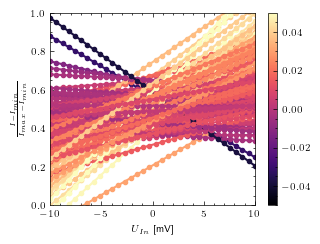

In [110]:
xvals   = np.linspace(-10, 10, 100)
cmap    = plt.get_cmap('magma')

with plt.style.context(["science","nature","bright"]):

    fig = plt.figure(dpi=100)
    ax  = fig.add_subplot()
    
    for key in dic.keys():
        
        ys = dic[key]['Current'].values
        xs = dic[key]['E0'].values

        p, cov = curve_fit(lin_func, xs, ys)
        ax.errorbar(x=xvals, y=lin_func(xvals, *p), c=cmap(10*(p[0]+0.05)), lw=1.5, marker='o', markevery=3)

    ax.set_xlabel("$U_{In}$ [mV]")
    ax.set_ylabel("$\\frac{I - I_{min}}{I_{max} - I_{min}}$")
    ax.set_ylim(0,1)
    ax.set_xlim(-10,10)
    norm = mpl.colors.Normalize(vmin=-0.05, vmax=0.05)
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap='magma')
    cmap.set_array([])
    fig.colorbar(cmap)

fig.savefig("ndr_current_curves.svg", bbox_inches='tight', transparent=True)
fig.savefig("ndr_current_curves.pdf", bbox_inches='tight', transparent=False)
plt.show()